# Details

This notebook is primarily for data exploration. I explore the relationships between all the variables and sale price. I conclude by running multiple regression, toying with interaction features, and running Ridge and Lasso models.

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
ahp = pd.read_csv('Ames_HousePrice.csv')
ared = pd.read_csv('Ames Real Estate Data.csv')

/Users/jamesreno/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [335]:
ahp[ahp['TotalBsmtSF']==0]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
5,6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
96,97,535457050,925,99000,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,925,0,0,0.0,0.0,1,0,3,1,TA,7,Typ,0,NaN,Attchd,1961.0,Fin,1.0,300.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
164,165,531475220,1882,160000,90,RL,75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,2Story,6,7,1981,1981,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,964,918,0,0.0,0.0,2,0,4,2,TA,8,Typ,2,TA,Attchd,1981.0,Unf,2.0,612.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
209,210,905228050,660,63900,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
215,216,535450160,1040,92900,90,RL,60.0,8544,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1950,1950,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Fa,N,FuseA,1040,0,0,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1987.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
328,329,535327230,1764,100000,20,RL,71.0,8838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,3,1957,1982,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1764,0,0,0.0,0.0,2,1,4,1,TA,7,Maj2,1,TA,Attchd,1957.0,Fin,1.0,301.0,TA,TA,Y,0,72,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
336,337,908204180,1152,61500,90,RL,74.0,6882,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,3,1955,1955,Gable,CompShg,AsbShng,Plywood,BrkCmn,128.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,1152,0,0,0.0,0.0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,WD,Normal
452,453,902427045,882,97000,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,FuseA,882,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1.0,308.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
478,479,532351150,1654,119500,90,RM,68.0,8927,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,Duplex,1.5Fin,6,6,1977,1977,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1286,368,0,0.0,0.0,2,0,4,2,TA,10,Typ,0,NaN,Attchd,1977.0,RFn,2.0,528.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal
495,496,902205

In [164]:
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)


In [14]:
ahp.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

In [8]:
ahp['PID'].unique()

2579

In [25]:
ahp.groupby(['MSZoning','MSSubClass','BldgType'])['PID','SalePrice','GrLivArea','LotArea'].aggregate({'PID':'count',\
            'SalePrice':'median','GrLivArea':'median','LotArea':'median'})

/var/folders/w6/m13k9fgs76s835wznks2wrwh0000gn/T/ipykernel_37824/1117059695.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ahp.groupby(['MSZoning','MSSubClass','BldgType'])['PID','SalePrice','GrLivArea','LotArea'].aggregate({'PID':'count',\


PID  SalePrice  GrLivArea  LotArea
MSZoning MSSubClass BldgType                                    
A (agr)  20         1Fam        1    81500.0     1600.0  31250.0
C (all)  20         1Fam        1    35311.0      480.0   9000.0
         30         1Fam        5    75000.0      816.0   7879.0
         50         1Fam        5    78000.0     1049.0   7500.0
         70         1Fam        3    65000.0     1317.0   8500.0
         190        2fmCon      3   119600.0     1991.0   8250.0
FV       20         1Fam       23   230000.0     1448.0   8640.0
         60         1Fam       36   240950.0     1850.0   8640.0
         120        TwnhsE     17   199900.0     1378.0   4217.0
         160        Twnhs      19   172500.0     1501.0   2544.0
                    TwnhsE     18   167250.0     1452.0   3222.5
I (all)  30         1Fam        1    57625.0      810.0  21780.0
         70         1Fam        1   103000.0     1836.0  56600.0
RH       20         1Fam        3   105000.0      896.0   8900.0
         30         1Fam        2    73250.0      893.0   7035.0
         45         1Fam        1    76000.0      784.0   9000.0
         50         1Fam        1   159434.0     1520.0   4500.0
         70         1Fam        2   121800.0     1425.5   9392.0
         90         Duplex      4   145000.0     2011.0   7168.0
         120        TwnhsE      5   177000.0     1337.0   5858.0
         160        Twnhs       1   137000.0     1320.0   3612.0
         190        2fmCon      2   137450.0     1804.0   6565.0
RL       20         1Fam      893   156500.0     1268.0  10143.0
         30         1Fam       57   105000.0      864.0   8574.0
         40         1Fam        4   134750.0     1164.0  11093.0
         45         1Fam        6   109000.0      887.5   8413.5
         50         1Fam      145   138500.0     1524.0   9780.0
         60         1Fam      463   210900.0     1892.0  10560.0
         70         1Fam       52   171000.0     1645.5   9565.0
         75         1Fam        8   203250.0     2195.5   9030.0
         80         1Fam      106   165500.0     1353.0  10188.0
         85         1Fam       43   149900.0      999.0   9101.0
         90         Duplex     73   137000.0     1680.0   9400.0
         120        1Fam        4   243950.0     1580.0   6413.5
                    Twnhs      17   196000.0     1235.0   3880.0
                    TwnhsE     88   202582.5     1369.0   5392.0
         150        Twnhs       1   148400.0     1700.0   1700.0
         160        1Fam        1   270000.0     2687.0  13108.0
                    Twnhs      10   149200.0     1456.0   2284.5
                    TwnhsE     10   146500.0     1502.0   2364.0
         190        1Fam        1   145000.0     1721.0  10532.0
                    2fmCon     26   129500.0     1237.5  10591.0
RM       20         1Fam       17   115000.0      960.0   7407.0
                    2fmCon      1    93000.0      936.0   6000.0
         30         1Fam       58    99950.0      870.5   6210.0
         40         1Fam        2   115750.0     1275.5   7250.0
         45         1Fam       10   113000.0      894.0   6120.0
         50         1Fam      108   128000.0     1380.0   6240.0
         60         1Fam        2   173650.0     1670.5   6579.0
                    2fmCon      1   160000.0     1984.0   8094.0
         70         1Fam       58   138700.0     1549.0   8247.0
         75         1Fam       13   144000.0     2058.0   8850.0
         80         1Fam        3   126000.0     1656.0  11800.0
         90         Duplex     10   122000.0     1691.0   8699.5
         120        Twnhs       2   141750.0     1080.5   3447.0
                    TwnhsE     36   158200.0     1101.0   4435.0
         160        Twnhs      40   107000.0     1092.0   1680.0
                    TwnhsE     21   106000.0     1229.0   2160.0
         180        Twnhs       8    88500.0      809.0   1596.0
                    TwnhsE      7   142500.0     1072.0   3675.0


In [73]:
ahp.isna().sum()

Unnamed: 0          0
PID                 0
GrLivArea           0
SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage       462
LotArea             0
Street              0
Alley            2412
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         14
MasVnrArea         14
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           69
BsmtCond           69
BsmtExposure       71
BsmtFinType1       69
BsmtFinSF1          1
BsmtFinType2       70
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical

In [54]:
ahp.groupby(['Neighborhood', 'BldgType'])['LotFrontage'].describe()

count        mean        std    min     25%    50%  \
Neighborhood BldgType                                                       
Blmngtn      1Fam        3.0   49.666667   5.773503   43.0   48.00   53.0   
             TwnhsE     12.0   46.166667   4.706540   43.0   43.00   43.0   
Blueste      Twnhs       5.0   24.000000   0.000000   24.0   24.00   24.0   
             TwnhsE      5.0   30.600000   6.024948   24.0   24.00   35.0   
BrDale       Twnhs      23.0   21.000000   0.000000   21.0   21.00   21.0   
             TwnhsE      6.0   23.500000   1.224745   21.0   24.00   24.0   
BrkSide      1Fam       90.0   55.966667  13.022409   50.0   50.00   51.5   
             2fmCon      2.0   55.000000   7.071068   50.0   52.50   55.0   
ClearCr      1Fam       17.0   89.764706  23.805276   62.0   79.00   81.0   
             Twnhs       0.0         NaN        NaN    NaN     NaN    NaN   
CollgCr      1Fam      185.0   70.627027  14.742217   36.0   64.00   70.0   
             Duplex      1.0   83.000000        NaN   83.0   83.00   83.0   
             TwnhsE      4.0   36.750000   0.500000   36.0   36.75   37.0   
Crawfor      1Fam       63.0   72.079365  18.616938   40.0   55.50   70.0   
             2fmCon      2.0   84.500000   7.778175   79.0   81.75   84.5   
             Duplex      3.0   80.666667   2.309401   78.0   80.00   82.0   
             TwnhsE      6.0   47.333333   8.164966   44.0   44.00   44.0   
Edwards      1Fam      124.0   68.653226  16.991650   44.0   60.00   67.0   
             2fmCon      5.0   63.200000   5.761944   56.0   60.00   62.0   
             Duplex     10.0   67.600000  15.500538   38.0   61.25   70.5   
             Twnhs       4.0   24.000000   0.000000   24.0   24.00   24.0   
             TwnhsE      8.0   36.000000   3.070598   32.0   35.00   35.0   
Gilbert      1Fam       89.0   71.696629  24.643552   41.0   59.00   63.0   
             2fmCon      2.0  147.500000  67.175144  100.0  123.75  147.5   
Greens       Twnhs       3.0   38.666667   2.309401   36.0   38.00   40.0   
             TwnhsE      4.0   42.750000  13.047988   30.0   37.50   40.0   
GrnHill      TwnhsE      0.0         NaN        NaN    NaN     NaN    NaN   
IDOTRR       1Fam       62.0   60.338710  15.320557   40.0   50.00   60.0   
             2fmCon      7.0   61.000000   8.962886   50.0   56.00   60.0   
             Duplex      1.0  110.000000        NaN  110.0  110.00  110.0   
Landmrk      Twnhs       0.0         NaN        NaN    NaN     NaN    NaN   
MeadowV      Twnhs      16.0   21.625000   2.500000   21.0   21.00   21.0   
             TwnhsE     14.0   31.142857  10.683252   21.0   21.00   28.5   
Mitchel      1Fam       67.0   76.835821  27.651290   37.0   62.00   74.0   
             2fmCon      0.0         NaN        NaN    NaN     NaN    NaN   
             Duplex      8.0   76.875000  14.642770   55.0   68.75   76.5   
             Twnhs       1.0   32.000000        NaN   32.0   32.00   32.0   
             TwnhsE      4.0   39.500000  15.000000   32.0   32.00   32.0   
NAmes        1Fam      314.0   75.757962  18.991978   47.0   66.00   73.5   
             2fmCon      2.0   72.500000   3.535534   70.0   71.25   72.5   
             Duplex     26.0   74.000000  13.296616   60.0   63.50   71.0   
             TwnhsE      5.0   29.000000   4.123106   26.0   26.00   26.0   
NPkVill      Twnhs      11.0   24.000000   0.000000   24.0   24.00   24.0   
             TwnhsE      9.0   30.444444  12.787798   24.0   24.00   24.0   
NWAmes       1Fam       76.0   81.342105  12.525763   46.0   78.00   80.0   
             2fmCon      1.0   79.000000        NaN   79.0   79.00   79.0   
             Duplex      2.0   81.000000   8.485281   75.0   78.00   81.0   
NoRidge      1Fam       51.0   90.450980  20.391482   52.0   82.00   89.0   
NridgHt      1Fam       83.0   98.301205  16.745392   56.0   88.50   99.0   
             Twnhs      12.0   34.666667   0.984732   34.0   34.00   34.0   
             TwnhsE

In [138]:
ahp.corr().sort_values(by='SalePrice')

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
PID,-0.008030,1.000000,-0.102270,-0.226276,-0.005328,-0.095379,0.042049,-0.247168,0.120013,-0.337963,-0.128744,-0.230344,-0.112468,-0.003342,-0.074497,-0.192437,-0.153903,0.012507,0.058171,-0.044292,0.001853,-0.154209,-0.172690,0.001290,0.047760,-0.074269,-0.108646,-0.255861,-0.221074,-0.198988,-0.041876,-0.054843,0.168778,-0.021198,-0.031646,-0.006526,-0.022524,-0.059940,0.002238
EnclosedPorch,-0.033399,0.168778,0.000196,-0.123235,-0.028535,0.003480,0.017694,-0.134291,0.085910,-0.360933,-0.205205,-0.103015,-0.107396,0.011894,0.019845,-0.085045,-0.068892,0.054699,0.063054,-0.076913,-0.024529,-0.112192,-0.075844,0.050877,0.028419,0.020376,-0.004869,-0.287772,-0.126893,-0.104458,-0.117492,-0.046038,1.000000,-0.031070,-0.068210,0.077414,0.014934,-0.006403,0.004786
KitchenAbvGr,0.014445,0.047760,0.129797,-0.113977,0.251357,0.018644,-0.014575,-0.153691,-0.075642,-0.136983,-0.145110,-0.040105,-0.105860,-0.041383,0.103510,-0.020679,0.080037,0.080111,-0.014375,-0.052648,-0.050554,0.188405,-0.051162,0.259535,1.000000,0.305170,-0.114644,-0.093127,-0.030452,-0.045429,-0.087870,-0.051751,0.028419,-0.019766,-0.053424,-0.010906,0.040088,0.044671,0.015768
OverallCond,-0.005499,0.120013,-0.105670,-0.101091,-0.075542,-0.054048,-0.032693,-0.095927,1.000000,-0.397274,0.065100,-0.143986,-0.064347,0.029990,-0.123998,-0.179473,-0.156592,0.015073,0.019018,-0.057921,0.085160,-0.210226,-0.096052,0.004108,-0.075642,-0.072482,-0.046570,-0.335619,-0.195780,-0.168238,0.014161,-0.067437,0.085910,0.041904,0.050417,-0.021193,0.046015,0.012211,0.017632
MSSubClass,0.003400,-0.005328,0.070785,-0.084587,1.000000,-0.438724,-0.198040,0.056468,-0.075542,0.053852,0.056756,0.017831,-0.074092,-0.074091,-0.113257,-0.221931,-0.255798,0.306929,0.013473,-0.002150,-0.010580,0.144475,0.181780,-0.023680,0.251357,0.032047,-0.047790,0.111145,-0.031963,-0.091177,-0.017656,-0.007649,-0.028535,-0.041798,-0.055099,-0.013431,-0.027226,0.007252,-0.025351
BsmtHalfBath,-0.001839,0.001853,-0.053401,-0.033802,-0.010580,-0.028832,0.027586,-0.050571,0.085160,-0.028800,-0.048623,0.002436,0.067414,0.101400,-0.108801,0.000899,-0.002257,-0.056733,-0.024282,-0.164064,1.000000,-0.038042,-0.068386,0.021276,-0.050554,-0.049521,0.037626,-0.053576,-0.029313,-0.018288,0.057099,-0.037192,-0.024529,-0.009603,0.033668,0.069747,-0.002205,0.031366,-0.023113
LowQualFinSF,-0.000045,0.058171,0.088931,-0.030835,0.013473,-0.010623,-0.000334,-0.044359,0.019018,-0.132086,-0.063714,-0.054146,-0.070774,-0.004431,0.048269,-0.025408,-0.009215,0.005935,1.000000,-0.043981,-0.024282,0.008791,-0.029765,0.047165,-0.014375,0.098096,0.001921,-0.049380,-0.043485,-0.033351,-0.007544,-0.003367,0.063054,-0.002534,0.014550,-0.005239,-0.005184,0.012268,-0.002848
Unnamed: 0,1.000000,-0.008030,-0.013745,-0.028413,0.003400,0.012410,-0.019958,-0.017036,-0.005499,0.004610,-0.009982,-0.024033,-0.010264,-0.013178,-0.007917,-0.024063,-0.028042,0.009027,-0.000045,-0.014439,-0.001839,0.000271,0.006548,0.025785,0.014445,0.011619,0.000453,-0.023296,-0.005152,-0.003580,-0.018456,-0.014715,-0.033399,-0.002035,0.003149,0.002005,-0.030896,0.011779,-0.008082
MiscVal,-0.030896,-0.022524,-0.003940,-0.018877,-0.027226,0.017859,0.040220,-0.025825,0.046015,-0.027354,-0.016669,-0.021950,0.014571,-0.003980,-0.021028,-0.008074,-0.006890,0.002111,-0.005184,-0.023791,-0.002205,-0.020818,0.017073,0.015412,0.040088,0.011220,-0.016329,-0.023506,-0.040696,-0.028011,0.019774,0.016613,0.014934,0.001152,0.003519,0.021245,1.000000,-0.009245,0.019348
YrSold,-0.008082,0.002238,-0.008260,-0.001376,-0.025351,-0.002555,-0.017319,0.005668,0.017632,0.015349,0

Creating a dataframe of correlations to then choose the number of comparisons that can fit in a window to explore at one time. I check the number of those that will be included and then adjust the correlation cutoffs accordingly to make correlation matrix plots that can be easily interpreted.

In [139]:
sp_corr = pd.DataFrame(ahp.corr()['SalePrice'].sort_values(ascending=False))

In [155]:
sp_corr.loc[sp_corr['SalePrice']>0.6].index


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF',
       'GarageCars', 'GarageArea'],
      dtype='object')

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', y

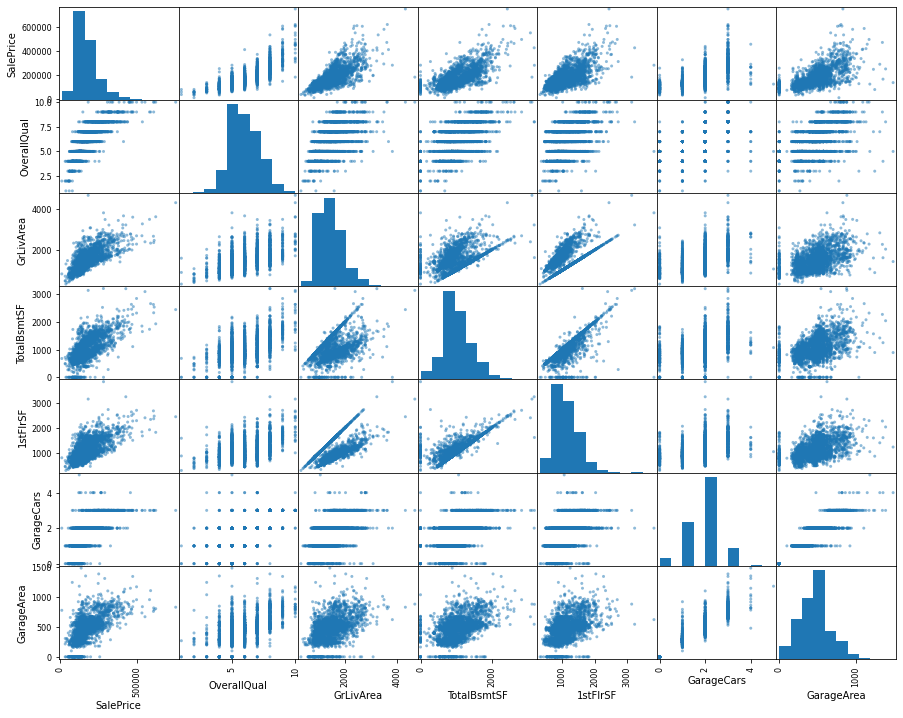

In [159]:
pd.plotting.scatter_matrix(ahp[sp_corr.loc[sp_corr['SalePrice']>0.6].index],figsize=(15,12))

Basement SF seems to have more constant variance than GRLivArea.
1st flrSF seems similarly related to garage area - maybe a cautionary tail of overinterpreting.

In [241]:
len(sp_corr.loc[((sp_corr['SalePrice']<=0.1)&(sp_corr['SalePrice']>-0.05))|(sp_corr['SalePrice']==1.00)])

#sp_corr['SalePrice']

10

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='YearBuilt'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='YearBuilt'>,
        <AxesSubplot:xlabel='FullBath', ylabel='YearBuilt'>,
        <AxesSubplot:xlabel='GarageYrBlt', ylabel='YearBuilt'>,
        <AxesSubplot:xlabel='YearRemodAdd', ylabel='YearBuilt'>,
        <AxesSubplot:xlabel='MasVnrArea', ylabel='YearBuilt'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='FullBath'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='FullBath'>,
        <AxesSubplot:xlabel='FullBath', ylabel='FullBath'>,
        <AxesSubplot:xlabel='GarageYrBlt', ylabel='FullBath'>,

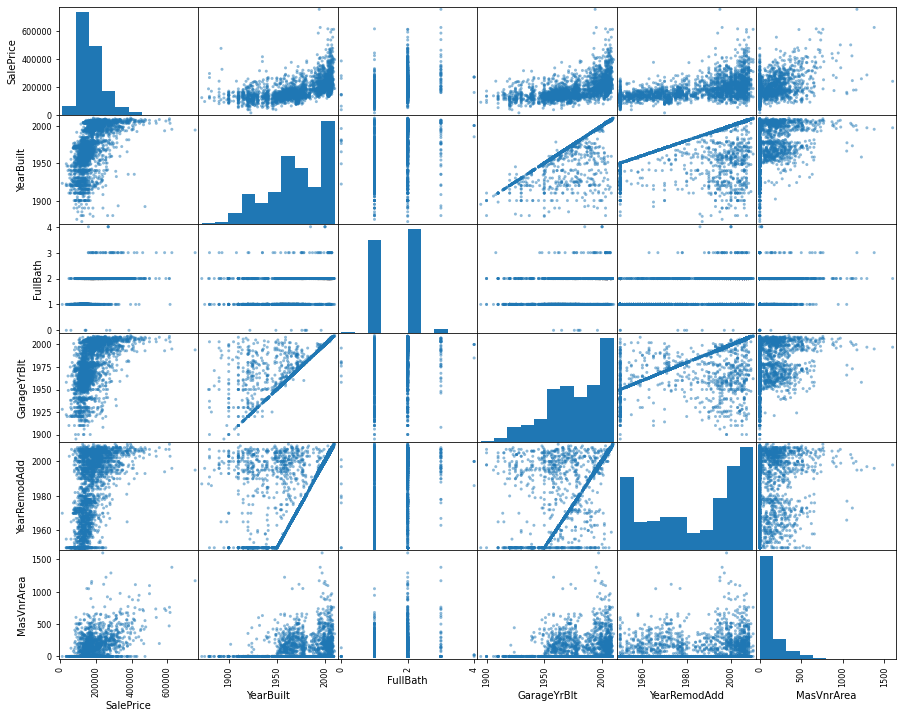

In [232]:
pd.plotting.scatter_matrix(ahp[sp_corr.loc[((sp_corr['SalePrice']<=0.6)&(sp_corr['SalePrice']>0.5))\
                    |(sp_corr['SalePrice']==1.00)].index],figsize=(15,12))

Year Remodel and Garage Year Built may be better to subtract from sale year and get recency.
Baths need to be label encoded maybe?

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='TotRmsAbvGrd'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='TotRmsAbvGrd'>,
        <AxesSubplot:xlabel='Fireplaces', ylabel='TotRmsAbvGrd'>,
        <AxesSubplot:xlabel='BsmtFinSF1', ylabel='TotRmsAbvGrd'>,
        <AxesSubplot:xlabel='LotFrontage', ylabel='TotRmsAbvGrd'>,
        <AxesSubplot:xlabel='WoodDeckSF', ylabel='TotRmsAbvGrd'>,
        <AxesSubplot:xlabel='OpenPorchSF', ylabel='TotRmsAbvGrd'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='Fireplaces'>,
        <AxesSubplot:xlabe

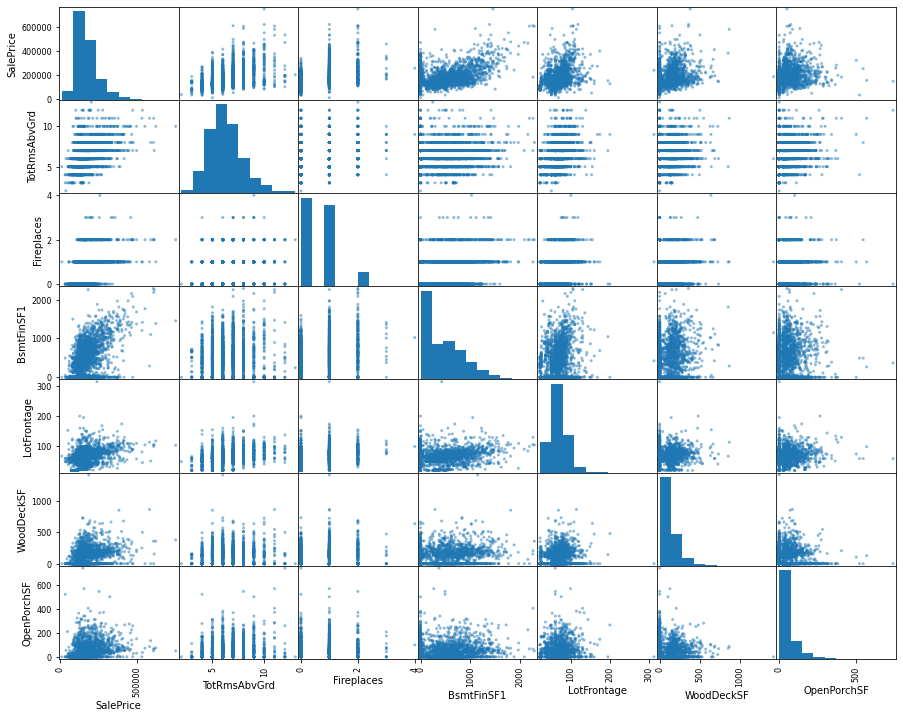

In [235]:
pd.plotting.scatter_matrix(ahp[sp_corr.loc[((sp_corr['SalePrice']<=0.5)&(sp_corr['SalePrice']>0.3))\
                    |(sp_corr['SalePrice']==1.00)].index],figsize=(15,12))

Is there a way to weight coefficients?
BSMTFINSF1 may be correlated but zeroes (maybe those without basements) are mucking up the relationship
Maybe take lot frontage and divide by 1/2 if corner house?

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='ScreenPorch', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='BsmtFullBath'>,
        <AxesSubplot:xlabel='BsmtFullBath', ylabel='BsmtFullBath'>,
        <AxesSubplot:xlabel='HalfBath', ylabel='BsmtFullBath'>,
        <AxesSubplot:xlabel='LotArea', ylabel='BsmtFullBath'>,
        <AxesSubplot:xlabel='2ndFlrSF', ylabel='BsmtFullBath'>,
        <AxesSubplot:xlabel='BsmtUnfSF', ylabel='BsmtFullBath'>,
        <AxesSubplot:xlabel='BedroomAbvGr', ylabel='BsmtFullBath'>,
        <AxesSubplot:xlabel='ScreenPorch',

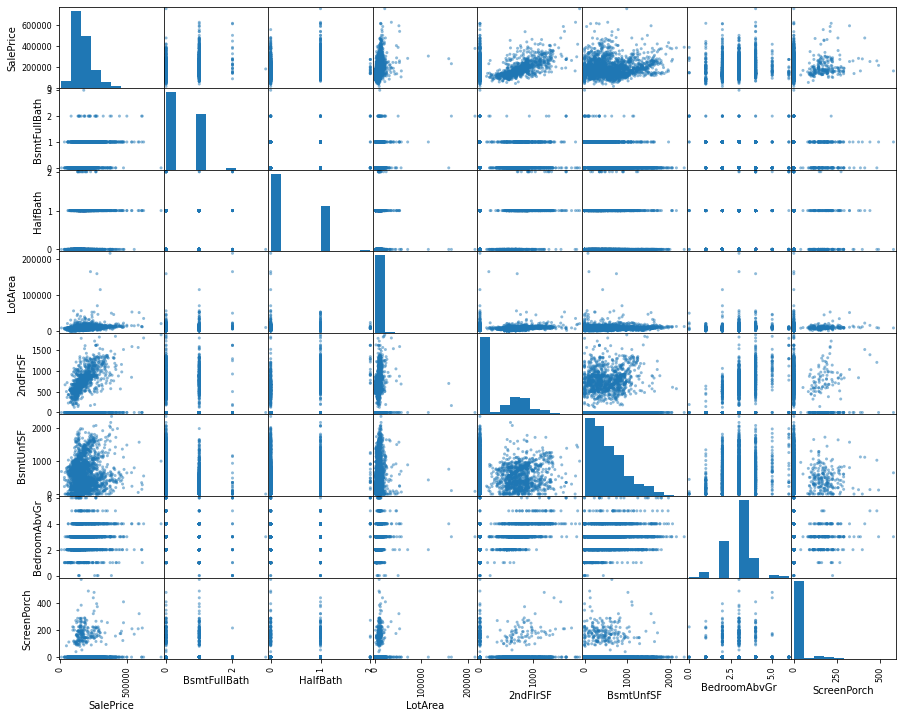

In [237]:
pd.plotting.scatter_matrix(ahp[sp_corr.loc[((sp_corr['SalePrice']<=0.3)&(sp_corr['SalePrice']>0.1))\
                    |(sp_corr['SalePrice']==1.00)].index],figsize=(15,12))

2ndFlrSF seems highly correlated with price zeroes potentially causing problems here too.

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='3SsnPorch', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='Unnamed: 0', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='BsmtHalfBath', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='3SsnPorch'>,
        <AxesSubplot:xlabel='3SsnPorch', ylabel='3SsnPorch'>,
        <AxesSubplot:xlabel='PoolArea', ylabel='3SsnPorch'>,
        <AxesSubplot:xlabel='BsmtFinSF2', ylabel='3SsnPorch'>,
        <AxesSubplot:xlabel='MoSold', ylabel='3SsnPorch'>,
        <AxesSubplot:xlabel='YrSold', ylabel='3SsnPorch'>,
        <AxesS

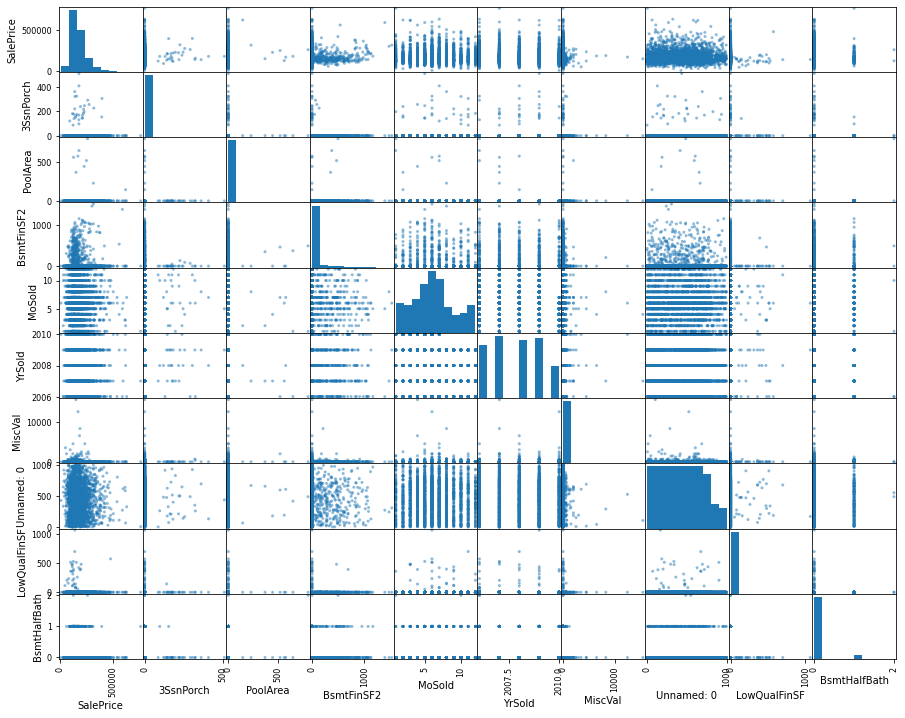

In [242]:
pd.plotting.scatter_matrix(ahp[sp_corr.loc[((sp_corr['SalePrice']<=0.1)&(sp_corr['SalePrice']>-0.05))\
                    |(sp_corr['SalePrice']==1.00)].index],figsize=(15,12))

Nothing here of particular interest.

In [246]:
len(sp_corr.loc[((sp_corr['SalePrice']<=-0.05)&(sp_corr['SalePrice']>-.9))\
                    |(sp_corr['SalePrice']==1.00)])

6

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='PID', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='MSSubClass', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='OverallCond', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='KitchenAbvGr', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='EnclosedPorch', ylabel='MSSubClass'>,
        <AxesSubplot:xlabel='PID', ylabel='MSSubClass'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallCond'>,
        <AxesSubplot:xlabel='MSSubClass', ylabel='OverallCond'>,
        <AxesSubplot:xlabel='OverallCond', ylabel='OverallCond'>,
        <AxesSubplot:xlabel='KitchenAbvGr', y

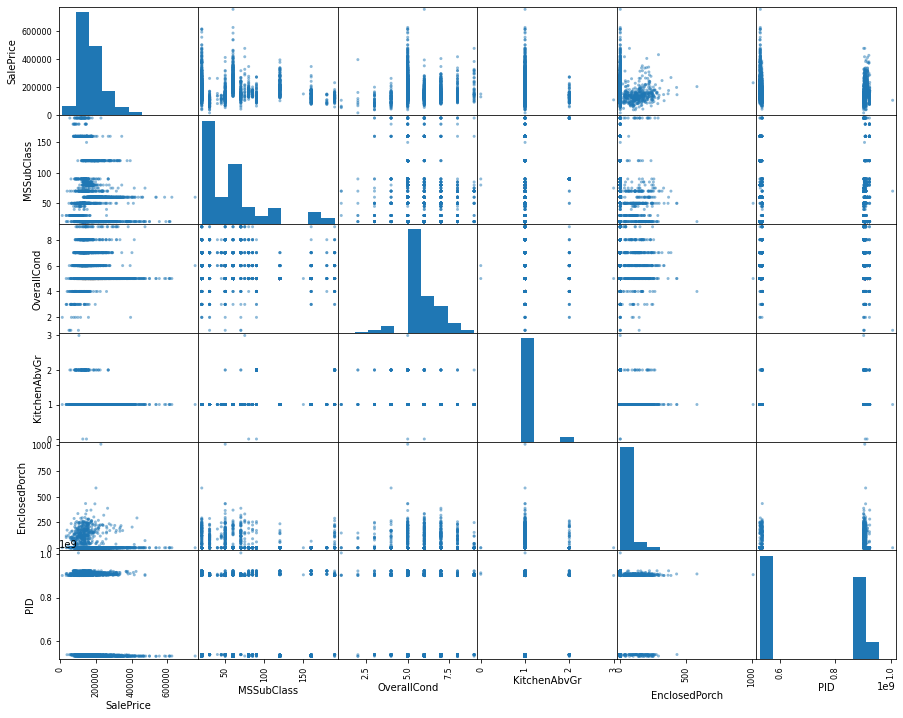

In [247]:
pd.plotting.scatter_matrix(ahp[sp_corr.loc[((sp_corr['SalePrice']<=-0.05)|(sp_corr['SalePrice']==1.00))].index],figsize=(15,12))

In [274]:
#added features of AgeSold and OutdoorSpace so reimporting data to examine relationship
clean_data = pd.read_csv('ML-Ames/data/Ames_HousePrice_cleaned.csv')

In [286]:
clean_data[['SalePrice','AgeSold','OurdoorSpace']]

,SalePrice,AgeSold,OurdoorSpace
0,126000,60.250000,166
1,139500,25.166667,105
2,124900,0.916667,282
3,114000,6.416667,279
4,227000,8.916667,45
5,198500,6.583333,177
6,93000,56.166667,144
7,187687,0.250000,124
8,137500,24.333333,0
9,140000,2.416667,44


array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='AgeSold', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OurdoorSpace', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='AgeSold'>,
        <AxesSubplot:xlabel='AgeSold', ylabel='AgeSold'>,
        <AxesSubplot:xlabel='OurdoorSpace', ylabel='AgeSold'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OurdoorSpace'>,
        <AxesSubplot:xlabel='AgeSold', ylabel='OurdoorSpace'>,
        <AxesSubplot:xlabel='OurdoorSpace', ylabel='OurdoorSpace'>]],
      dtype=object)

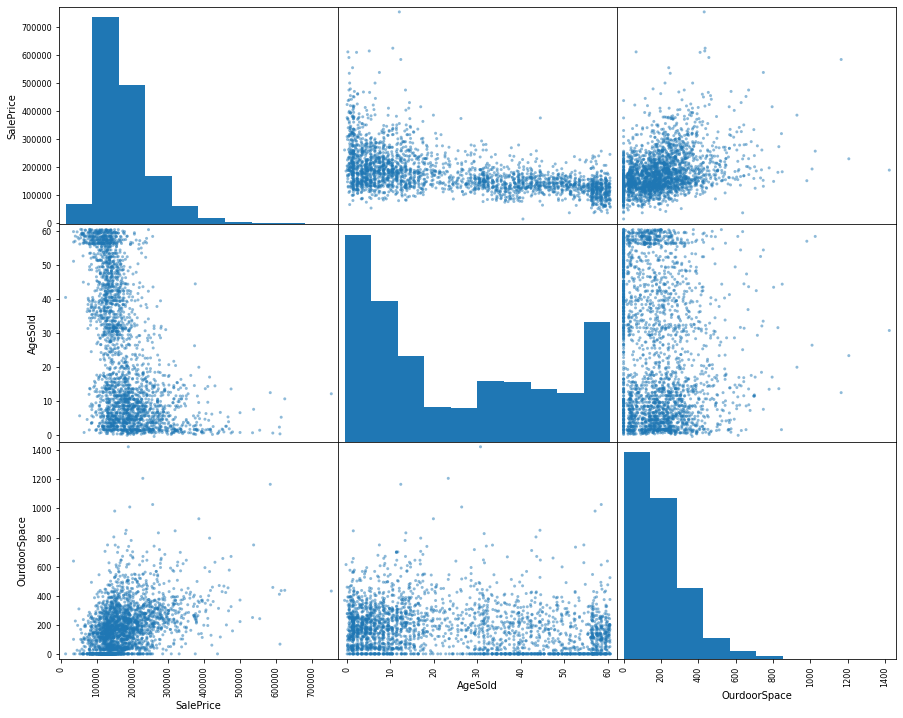

In [287]:
pd.plotting.scatter_matrix(clean_data[['SalePrice','AgeSold','OurdoorSpace']],figsize=(15,12))

In [ ]:
sns.scatterplot(x='SalePrice', y='GrLivArea',hue='BldgType',data=ahp)

In [ ]:
fig, ax = plt.subplots()

scatter=ax.scatter(x='SalePrice', y='GrLivArea', c=ahp['BldgType'].astype('category').cat.codes,data=ahp, \
                   label=ahp['BldgType'])
ax.legend()
#legend1 = ax.legend(handles=ahp.BldgType,
#                    loc="lower left", title="Classes")

# Models

Initial multiple linear regression, experimenting with R style regression formula implementation to sand box interaction terms. And finally the first implementation of Ridge and Lasso. 

In [288]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [160]:
x_train = pd.read_csv('test_train_1/x_train_dummies.csv')
y_train = pd.read_csv('test_train_1/y_train_dummies.csv')

In [211]:
x_test = pd.read_csv('test_train_1/x_test_dummies.csv')
y_test = pd.read_csv('test_train_1/y_test_dummies.csv')

In [161]:
ols = LinearRegression()

In [173]:
x_train.head()

,PID,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,Fireplaces,GarageArea,OurdoorSpace,MoSold,YrSold,YrMoSold,AgeSold,mssc_30,mssc_40,mssc_45,mssc_50,mssc_60,mssc_70,mssc_75,mssc_80,mssc_85,mssc_90,mssc_120,mssc_150,mssc_160,mssc_180,mssc_190,msz_C (all),msz_FV,msz_I (all),msz_RH,msz_RL,msz_RM,ls_IR2,ls_IR3,ls_Reg,lc_HLS,lc_Low,lc_Lvl,lcf_CulDSac,lcf_FR2,lcf_FR3,lcf_Inside,nghbr_Blueste,nghbr_BrDale,nghbr_BrkSide,nghbr_ClearCr,nghbr_CollgCr,nghbr_Crawfor,nghbr_Edwards,nghbr_Gilbert,nghbr_Greens,nghbr_GrnHill,nghbr_IDOTRR,nghbr_Landmrk,nghbr_MeadowV,nghbr_Mitchel,nghbr_NAmes,nghbr_NPkVill,nghbr_NWAmes,nghbr_NoRidge,nghbr_NridgHt,nghbr_OldTown,nghbr_SWISU,nghbr_Sawyer,nghbr_SawyerW,nghbr_Somerst,nghbr_StoneBr,nghbr_Timber,nghbr_Veenker,bt_2fmCon,bt_Duplex,bt_Twnhs,bt_TwnhsE,hs_1.5Unf,hs_1Story,hs_2.5Fin,hs_2.5Unf,hs_2Story,hs_SFoyer,hs_SLvl,mvt_BrkFace,mvt_None,mvt_Stone,eq_Fa,eq_Gd,eq_TA,ec_Fa,ec_Gd,ec_Po,ec_TA,f_CBlock,f_PConc,f_Slab,f_Stone,f_Wood,bq_Fa,bq_Gd,bq_Po,bq_TA,bc_Fa,bc_Gd,bc_Po,bc_TA,be_Gd,be_Mn,be_No,bf1_BLQ,bf1_GLQ,bf1_LwQ,bf1_Rec,bf1_Unf,bf2_BLQ,bf2_GLQ,bf2_LwQ,bf2_Rec,bf2_Unf,hq_Fa,hq_Gd,hq_Po,hq_TA,ca_Y,kq_Fa,kq_Gd,kq_Po,kq_TA,gt_Attchd,gt_Basment,gt_BuiltIn,gt_CarPort,gt_Detchd,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial
0,527146030,1616,5389,8,5,1995,1996,0.0,1180.0,0.0,1595.0,SBrkr,1616,0,2,2,1,608.0,389,3,2010,2010.250000,14.250000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,909279040,1180,11600,4,5,1922,1950,0.0,0.0,0.0,700.0,SBrkr,1180,0,1,2,1,252.0,67,7,2006,2006.583333,56.583333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
2,902206130,1251,6900,6,7,1938,2000,0.0,0.0,0.0,827.0,SBrkr,827,424,1,3,0,240.0,0,1,2010,2010.083333,10.083333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,534403280,1251,8800,6,6,1964,1964,425.0,553.0,0.0,1251.0,SBrkr,1251,0,1,3,2,461.0,116,3,2006,2006.250000,42.250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,910205010,1656,6000,5,5,1967,1967,0.0,257.0,0.0,624.0,SBrkr,1092,564,1,3,1,288.0,280,7,2008,2008.583333,41.583333,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [183]:
x_train_clean=x_train.loc[:,~x_train.columns.isin(['PID','Electrical','MoSold','YrSold','YrMoSold'])]

In [212]:
x_test_clean=x_test.loc[:,~x_test.columns.isin(['PID','Electrical','MoSold','YrSold','YrMoSold'])]

In [210]:
ols.fit(x_train_clean,y_train)

ols.score(x_train_clean, y_train)

0.922765233433825

In [216]:
ols.score(x_test_clean, y_test)

0.9015793855991321

In [340]:
X_add_const = sm.add_constant(x_train_clean)
ols = sm.OLS(y_train['SalePrice'], X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     138.9
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        12:31:04   Log-Likelihood:                -20519.
No. Observations:                1806   AIC:                         4.133e+04
Df Residuals:                    1662   BIC:                         4.212e+04
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.148e+05   1.53e+04      7.489

In [345]:
#X_add_const = sm.add_constant(x_train_clean)
#ols = sm.OLS(y_train['SalePrice'], X_add_const)
#ans = ols.fit()
#print(ans.summary())

mod = smf.ols(formula='SalePrice ~ 1 +  TotalBsmtSF', data=ahp)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     1908.
Date:                Fri, 20 May 2022   Prob (F-statistic):          2.14e-312
Time:                        12:48:22   Log-Likelihood:                -31895.
No. Observations:                2579   AIC:                         6.379e+04
Df Residuals:                    2577   BIC:                         6.381e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.691e+04   2992.132     19.019      

### Initial Ridge and Lasso Regression and Graphs Below

In [289]:
ridge = Ridge()


In [300]:
x_train_clean.columns

Index(['GrLivArea', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       ...
       'gt_BuiltIn', 'gt_CarPort', 'gt_Detchd', 'pd_P', 'pd_Y', 'sc_AdjLand',
       'sc_Alloca', 'sc_Family', 'sc_Normal', 'sc_Partial'],
      dtype='object', length=144)

In [321]:
alphas = np.linspace(0,25,100)
ridge.set_params(normalize=True)
coefs  = []
scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(x_train_clean, y_train['SalePrice'])  
        coefs.append(ridge.coef_)
        
        scores.append(ridge.score(x_train_clean, y_train['SalePrice']))
coefs = pd.DataFrame(coefs, index = alphas, columns = x_train_clean.columns)  
coefs.head()

,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,Fireplaces,GarageArea,OurdoorSpace,AgeSold,mssc_30,mssc_40,mssc_45,mssc_50,mssc_60,mssc_70,mssc_75,mssc_80,mssc_85,mssc_90,mssc_120,mssc_150,mssc_160,mssc_180,mssc_190,msz_C (all),msz_FV,msz_I (all),msz_RH,msz_RL,msz_RM,ls_IR2,ls_IR3,ls_Reg,lc_HLS,lc_Low,lc_Lvl,lcf_CulDSac,lcf_FR2,lcf_FR3,lcf_Inside,nghbr_Blueste,nghbr_BrDale,nghbr_BrkSide,nghbr_ClearCr,nghbr_CollgCr,nghbr_Crawfor,nghbr_Edwards,nghbr_Gilbert,nghbr_Greens,nghbr_GrnHill,nghbr_IDOTRR,nghbr_Landmrk,nghbr_MeadowV,nghbr_Mitchel,nghbr_NAmes,nghbr_NPkVill,nghbr_NWAmes,nghbr_NoRidge,nghbr_NridgHt,nghbr_OldTown,nghbr_SWISU,nghbr_Sawyer,nghbr_SawyerW,nghbr_Somerst,nghbr_StoneBr,nghbr_Timber,nghbr_Veenker,bt_2fmCon,bt_Duplex,bt_Twnhs,bt_TwnhsE,hs_1.5Unf,hs_1Story,hs_2.5Fin,hs_2.5Unf,hs_2Story,hs_SFoyer,hs_SLvl,mvt_BrkFace,mvt_None,mvt_Stone,eq_Fa,eq_Gd,eq_TA,ec_Fa,ec_Gd,ec_Po,ec_TA,f_CBlock,f_PConc,f_Slab,f_Stone,f_Wood,bq_Fa,bq_Gd,bq_Po,bq_TA,bc_Fa,bc_Gd,bc_Po,bc_TA,be_Gd,be_Mn,be_No,bf1_BLQ,bf1_GLQ,bf1_LwQ,bf1_Rec,bf1_Unf,bf2_BLQ,bf2_GLQ,bf2_LwQ,bf2_Rec,bf2_Unf,hq_Fa,hq_Gd,hq_Po,hq_TA,ca_Y,kq_Fa,kq_Gd,kq_Po,kq_TA,gt_Attchd,gt_Basment,gt_BuiltIn,gt_CarPort,gt_Detchd,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial
0.000000,61.839981,0.423761,7808.110639,5849.852822,323.860515,-358.525419,20.239044,19.650657,12.305510,12.893454,-11.791657,-5.621794,-586.751793,-2808.655512,6377.846864,29.531026,7.200034,-417.123799,2811.386240,705.288150,14319.432767,6290.482247,-1475.939221,2403.900647,26108.319844,-17180.532649,-12255.824940,-7523.029402,-30378.925383,-32492.558254,-32033.066318,-31283.527469,-21187.061263,-14551.800330,-8.044168,2128.066538,-4216.001145,-862.488206,-5213.759648,5845.660484,6854.734004,2458.809639,13317.400385,5073.053710,9436.499239,8310.858712,-2763.334509,-6824.821363,1212.196378,6972.213432,5174.210169,-12801.868552,-10822.151177,-14532.865646,6438.794763,-23988.895236,-12491.608650,-4686.592203,114653.844522,-17788.391391,10898.373617,-2534.744067,-17307.012353,-19747.925369,12781.223314,-19909.597336,20497.019622,22184.129767,-24271.717349,-21086.268904,-19876.525591,-19895.126443,3648.635951,35285.729345,-8237.001515,-13139.503997,9343.144751,-10823.141976,-6435.213654,448.463974,-2008.660744,10578.452141,8328.796271,-7112.860209,4083.807218,20076.619584,21056.163064,1000.920857,5047.299842,3034.984303,-31731.354585,-32825.513869,-37111.911523,-8052.833993,307.792083,-8913.840058,700.724103,1763.674491,4122.364669,3564.952426,14368.429571,-8661.069015,-9176.909119,-13914.761622,-21331.256739,-10414.798753,10188.729003,10785.623308,17737.562268,10855.896312,7889.906925,-6233.563954,-5627.301774,-529.370605,5491.871274,-4025.861057,-575.952293,3700.097677,-2957.894548,8125.455099,-2753.079436,-1547.451448,-136.909552,-4709.902919,-1520.680638,-19867.833538,-3597.168016,-3255.266199,-19638.185470,-16534.897190,-898.094101,-20087.778277,-5886.339016,-7478.003904,-9175.678324,-10699.391216,-6017.312699,-4339.206047,2116.505937,-14623.284234,-2214.353374,-14083.813895,3990.809777,13529.837741
0.252525,20.489656,0.382606,7639.812881,3044.241718,-5.119863,-27.308432,28.857514,15.186062,5.496012,17.234811,20.118648,10.115903,2801.049032,-848.542637,7422.890205,31.114918,13.065753,-190.143952,-5090.180832,1730.737646,602.300473,-604.452320,5136.130099,-1957.791846,17865.624901,-4412.064972,-4492.023057,-7212.844147,-12096.879654,-16782.852265,-9249.072925,-3556.324531,-7160.460022,-11415.205945,3281.251040,-10080.354360,-1505.107211,2216.441857,-3777.876770,4535.867674,2725.176646,613.129211,10237.688129,-579.554505,2028.712911,7311.151220,-3897.672590,-4776.451927,664.821342,7594.269653,4618.520964,-1040.769059,-1679.086684,-3436.999778,12967.084607,-9410.104074,-2664.409729,-2603.957659,96222.876309,-3752.931164,5775.796741,181.625939,-4914.498136,-6808.495366,11379.822322,-6554.525521,26748.6

Text(0, 0.5, 'slope values')

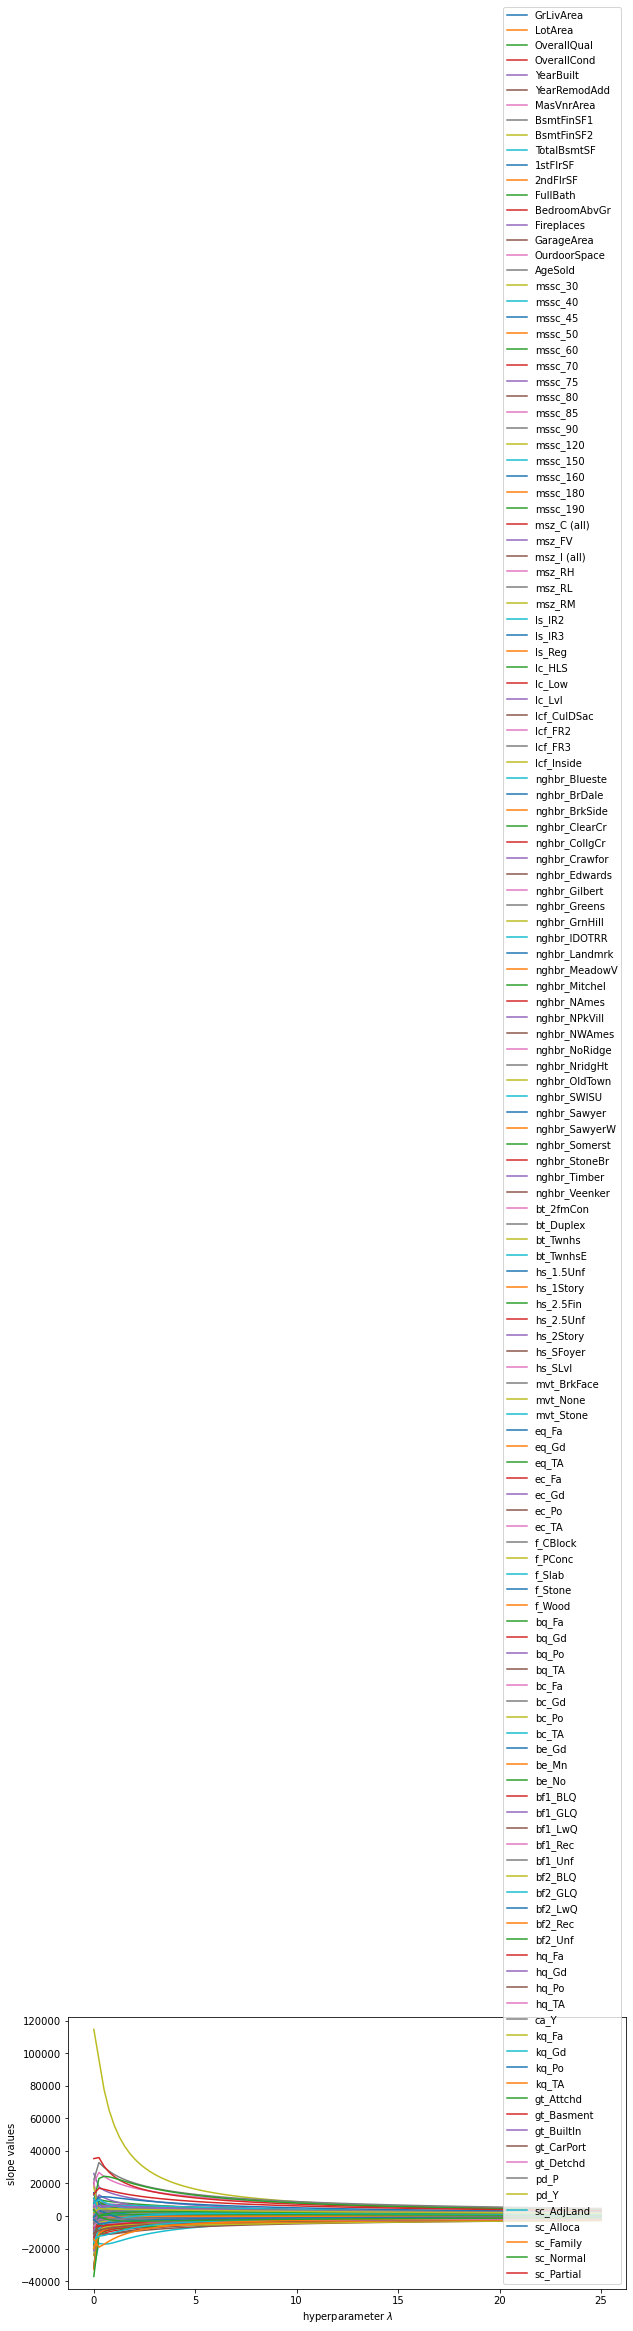

In [322]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

Text(0, 0.5, '$R^2$')

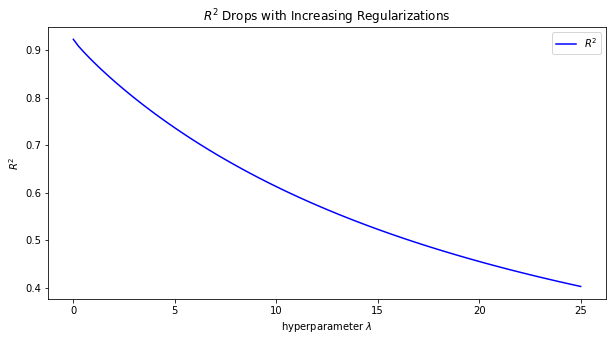

In [323]:
plt.plot(alphas, scores, c='b', label=r'$R^2$')
plt.legend(loc=1)
plt.title(r'$R^2$ Drops with Increasing Regularizations')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [324]:
lasso=Lasso()

In [329]:
alphas = np.linspace(0,100,100)
lasso.set_params(normalize=True)
lasso_coefs  = []
lasso_scores = []
for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(x_train_clean, y_train['SalePrice'])  
        lasso_coefs.append(lasso.coef_)
        
        lasso_scores.append(lasso.score(x_train_clean, y_train['SalePrice']))
lasso_coefs = pd.DataFrame(lasso_coefs, index = alphas, columns = x_train_clean.columns)  
lasso_coefs.head()

/var/folders/w6/m13k9fgs76s835wznks2wrwh0000gn/T/ipykernel_37824/2062780914.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x_train_clean, y_train['SalePrice'])
/Users/jamesreno/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/jamesreno/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390578230686.1113, tolerance: 1011405019.3030663
  model = cd_fast.enet_coordinate_descent(


,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,Fireplaces,GarageArea,OurdoorSpace,AgeSold,mssc_30,mssc_40,mssc_45,mssc_50,mssc_60,mssc_70,mssc_75,mssc_80,mssc_85,mssc_90,mssc_120,mssc_150,mssc_160,mssc_180,mssc_190,msz_C (all),msz_FV,msz_I (all),msz_RH,msz_RL,msz_RM,ls_IR2,ls_IR3,ls_Reg,lc_HLS,lc_Low,lc_Lvl,lcf_CulDSac,lcf_FR2,lcf_FR3,lcf_Inside,nghbr_Blueste,nghbr_BrDale,nghbr_BrkSide,nghbr_ClearCr,nghbr_CollgCr,nghbr_Crawfor,nghbr_Edwards,nghbr_Gilbert,nghbr_Greens,nghbr_GrnHill,nghbr_IDOTRR,nghbr_Landmrk,nghbr_MeadowV,nghbr_Mitchel,nghbr_NAmes,nghbr_NPkVill,nghbr_NWAmes,nghbr_NoRidge,nghbr_NridgHt,nghbr_OldTown,nghbr_SWISU,nghbr_Sawyer,nghbr_SawyerW,nghbr_Somerst,nghbr_StoneBr,nghbr_Timber,nghbr_Veenker,bt_2fmCon,bt_Duplex,bt_Twnhs,bt_TwnhsE,hs_1.5Unf,hs_1Story,hs_2.5Fin,hs_2.5Unf,hs_2Story,hs_SFoyer,hs_SLvl,mvt_BrkFace,mvt_None,mvt_Stone,eq_Fa,eq_Gd,eq_TA,ec_Fa,ec_Gd,ec_Po,ec_TA,f_CBlock,f_PConc,f_Slab,f_Stone,f_Wood,bq_Fa,bq_Gd,bq_Po,bq_TA,bc_Fa,bc_Gd,bc_Po,bc_TA,be_Gd,be_Mn,be_No,bf1_BLQ,bf1_GLQ,bf1_LwQ,bf1_Rec,bf1_Unf,bf2_BLQ,bf2_GLQ,bf2_LwQ,bf2_Rec,bf2_Unf,hq_Fa,hq_Gd,hq_Po,hq_TA,ca_Y,kq_Fa,kq_Gd,kq_Po,kq_TA,gt_Attchd,gt_Basment,gt_BuiltIn,gt_CarPort,gt_Detchd,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial
0.000000,62.096616,0.423823,7808.350238,5849.599014,323.827384,-358.588481,20.240949,19.650979,12.301933,12.896074,-12.049145,-5.858464,-587.660370,-2809.745595,6376.586420,29.528633,7.197831,-417.181338,2809.619526,680.78699,14322.834882,6291.526661,-1473.667268,2408.124790,26109.157344,-17177.033987,-12255.288034,-22705.493567,-30379.281525,-32527.920605,-32028.499957,-31284.503406,-21192.676733,-14354.940738,185.991648,2314.858345,-4024.421567,-670.356158,-5022.146935,5843.643052,6852.318495,2459.605419,13321.392447,5076.143309,9439.707355,8311.493027,-2762.832092,-6824.618482,1212.136317,6971.530880,5175.637816,-12802.086224,-10824.434907,-14535.095897,6436.476818,-23992.241503,-12492.599163,-4689.631117,114646.593542,-17794.582965,10900.128731,-2535.052912,-17307.020096,-19751.753220,12779.992593,-19912.718219,20491.798237,22182.561662,-24275.964648,-21090.987547,-19879.558986,-19897.673437,3645.304727,35282.527440,-8239.720142,-13144.173979,9349.927171,4359.167173,-6436.351568,448.121651,-1995.66118,10594.826827,8240.146989,-7112.833344,4082.739297,20090.139251,21065.340449,1000.549664,5047.304503,3035.735550,-31740.765489,-32826.828654,-37111.899926,-8045.374586,307.629791,-8919.695694,699.063562,1765.154835,4123.779046,3558.845508,14362.224004,-8659.671164,-9172.503668,-13914.209206,-21319.185242,-10414.468333,10177.184344,10776.993589,17729.714709,10847.977188,7889.505418,-6234.792714,-5628.120083,-529.209993,5491.550423,-4027.842829,-576.468633,3699.509197,-2957.340693,8127.501160,-2752.644909,-1545.656520,-138.105161,-4710.602028,-1519.764810,-19866.015429,-3596.792696,-3255.765064,-19635.111171,-16532.592102,-891.915371,-20086.715595,-5885.293620,-7473.345656,-9177.859837,-10698.711818,-6017.530701,-4342.188974,2113.580095,-14626.025009,-2217.883425,-14090.672327,3990.201163,13528.871078
1.010101,49.440996,0.410388,8152.739740,5491.913921,243.007173,-278.263530,19.655368,19.164506,11.734752,14.135781,-0.000000,3.129572,-386.109612,-2745.630229,6389.438743,29.426570,6.817401,-354.264057,337.994054,-0.00000,4141.364868,507.122034,-0.000000,-0.000000,22049.710434,-9136.571993,-8543.866724,-14948.911653,-27599.381837,-32643.589713,-28230.206688,-22270.497098,-13478.265717,-13230.846674,0.000000,-0.000000,-2207.428543,13.975486,-4306.248684,5334.841430,6136.811066,2359.617079,11872.778598,3611.823985,8002.443402,8257.018041,-2842.200282,-6093.942722,1217.311700,12196.389402,10148.195997,-4703.067119,-1940.886570,-5913.231955,14185.817442,-15434.009124,-3953.560400,0.000000,118873.941902,-9453.097070,14042.601907,3255.531871,-8437.536454,-11538.716503,18060.116151,-11383.029862,28772.459258,301

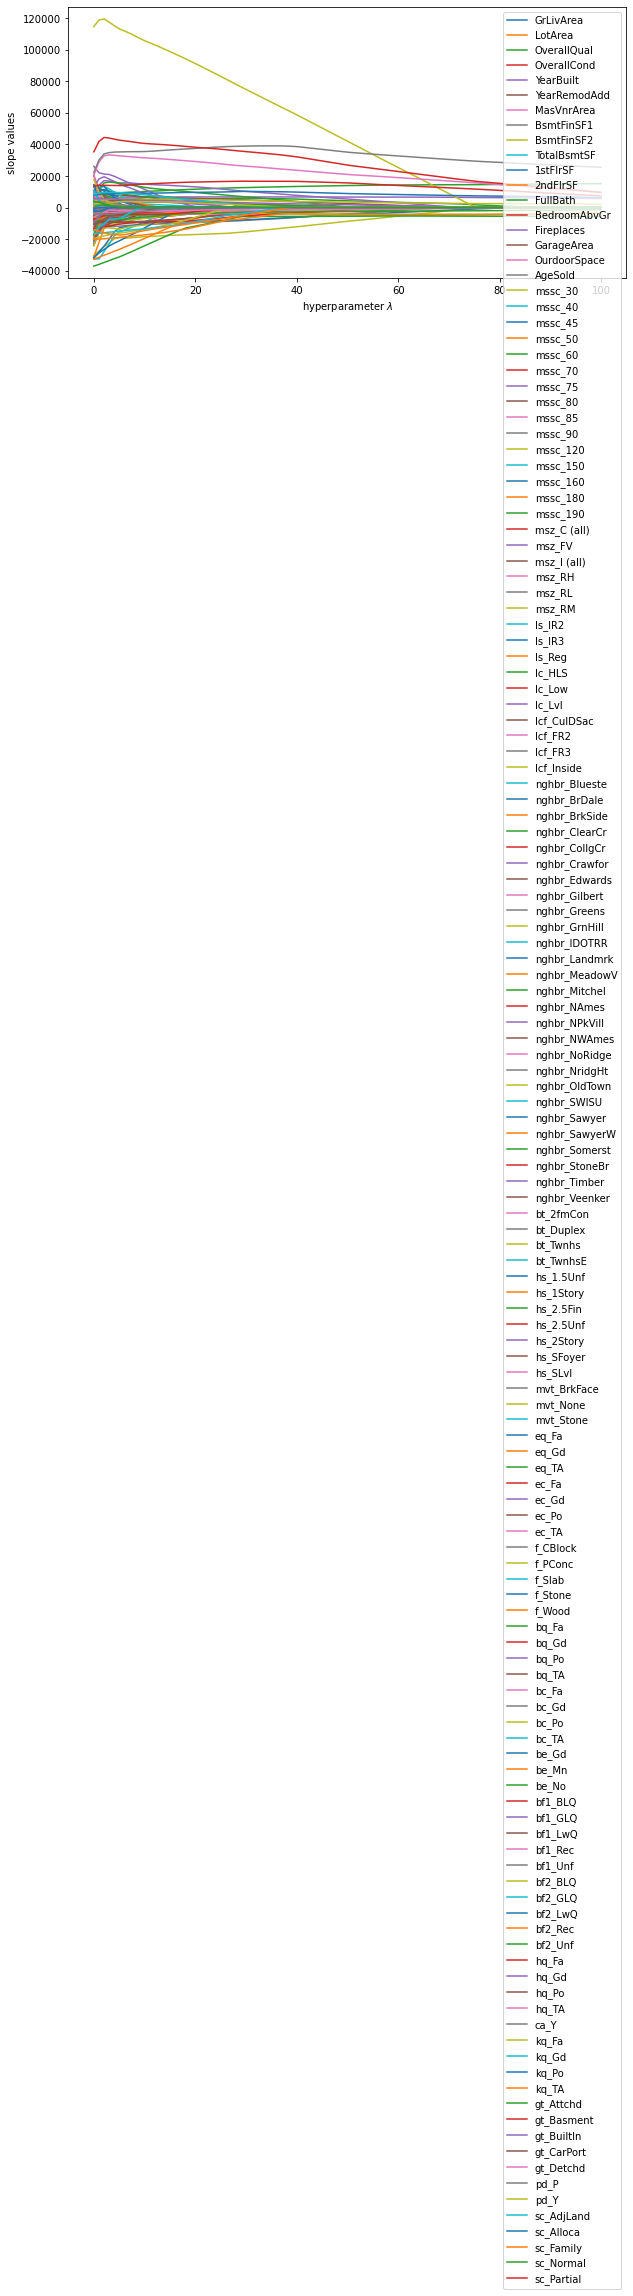

In [330]:
for name in lasso_coefs.columns:
    plt.plot(lasso_coefs.index, lasso_coefs[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)   

Text(0, 0.5, '$R^2$')

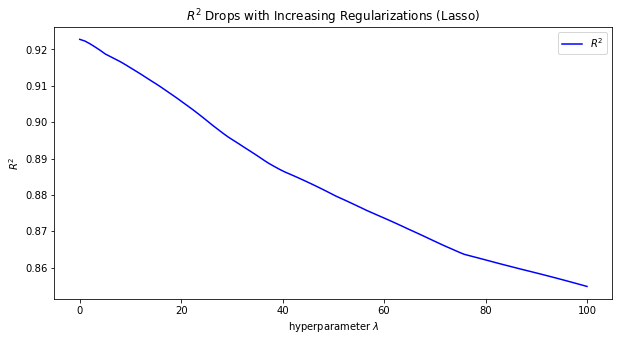

In [331]:
plt.plot(alphas, lasso_scores, c='b', label=r'$R^2$')
plt.legend(loc=1)
plt.title(r'$R^2$ Drops with Increasing Regularizations (Lasso)')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')